In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

## **Firearm analysis:**

In [2]:
# firearm_analysis/data_processing.py

import pandas as pd


def read_csv(url: str =
             "./Data/nics-firearm-background-checks.csv") -> pd.DataFrame:

    """
    Reads a CSV file from a specified URL and displays the first five
    rows and the information of the file.

    Args:
        (str, optional): URL of the CSV file. Must contain, at least, the
            columns "month", "state", "permit", "handgun" and "long_gun".
            Ddefaults to "./Data/nics-firearm-background-checks.csv".

    Returns:
        pd.DataFrame: DataFrame of the corresponding CSV file.
    """
    df = pd.read_csv(url)
    print("\nFirst five columns of the DataFrame:\n")
    display(df.head())
    print("\nStructure of the DataFrame:\n")
    display(df.info())
    return df


def clean_csv(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the DataFrame obtained from the CSV file obtained from the URL
    and cleans it by deleting all its columns except "month", "state",
    "permit", "handgun" and "long_gun".

    Args:
        df (pd.DataFrame): DataFrame from the CSV file.

    Returns:
        pd.DataFrame: DataFrame with the columns of interest.
    """
    columns_of_interest = ["month", "state", "permit", "handgun", "long_gun"]
    df_clean = df[columns_of_interest]
    print(f"\nColumns of the original DataFrame:\n{df.columns.tolist()}")
    print(f"\nColumns of the cleaned DataFrame:\n{df_clean.columns.tolist()}")
    return df_clean


def rename_col(df: pd.DataFrame) -> pd.DataFrame:
    """
    Modify the column name "longgun" for "long_gun" in the given DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with the original columns.

    Returns:
        pd.DataFrame: DataFrame with the modified column.
    """
    df.rename(columns={"longgun": "long_gun"}, inplace=True)
    print(f"\nOriginal DataFrame columns:\n{df.columns.tolist()}")
    print(f"\nColumns of DataFrame after renaming:\n{df.columns.tolist()}")
    return df


def breakdown_date(df: pd.DataFrame) -> pd.DataFrame:
    """
    Divides the "month" column of a given DataFrame into two columns:
    "year" and "month".

    Args:
        df (pd.DataFrame): DataFrame with the original "month" column
            in the format "YYYY-MM".

    Returns:
        pd.DataFrame: DataFrame with the columns "year" and "month".
    """
    month_index = df.columns.get_loc("month")  # find index of 'month' column
    df.insert(month_index, "year", "")  # insert 'year' col right before
    # Copy-on-Write reccomended way to change the values of an object
    df.loc[:, ["year"]] = df["month"].str.split("-", expand=True)[0]
    df.loc[:, ["month"]] = df["month"].str.split("-", expand=True)[1]
    print("\nDataFrame with 'month' columns splitted into 'year' and 'month':")
    display(df.head())
    return df


def erase_month(df: pd.DataFrame) -> pd.DataFrame:
    """
    Deletes the "month" column of a given DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with a "month" column.

    Returns:
        pd.DataFrame: DataFrame without the "month" column.
    """
    df = df.drop(columns=["month"])
    print("\nDataFrame withiut the 'month' column:")
    display(df.head())
    print(f"\nCurrent columns of the DataFrame:\n{df.columns.tolist()}")
    return df


def groupby_state_and_year(df: pd.DataFrame) -> pd.DataFrame:
    """
    Groups the data by the "year" and "state" columns of a given DataFrame and
    calculates the sum of the "permit", "handgun" and "long_gun" columns.

    Args:
        df (pd.DataFrame): DataFrame with the columns "year", "state",
        "permit", "handgun" and "long_gun".

    Returns:
        pd.DataFrame: DataFrame grouped by "state" and "year" with cumulative
        values.
    """
    grouped_df = df.groupby(["state", "year"]).sum().reset_index()
    print("\nGrouped data by 'year' and 'state':")
    display(grouped_df.head())
    return grouped_df


def print_biggest_handguns(df: pd.DataFrame):
    """
    Prints out the state and year with the biggest number of registered
    handguns.

    Args:
        df (pd.DataFrame): DataFrame with the columns "year", "state",
            "permit", "handgun" and "long_gun" groupped by "state" and "year".

    Returns:
        None
    """
    indx = df["handgun"].idxmax()
    max_row = df.loc[indx]
    print(f"\nThe biggest number handguns was registered in "
          f"{max_row['state']} during the year {max_row['year']} "
          f"with a total of {max_row['handgun']} handguns.")


def print_biggest_longguns(df: pd.DataFrame):
    """
    Prints out the state and year with the biggest number of registered long
    guns.

    Args:
        df (pd.DataFrame): DataFrame with the columns "year", "state",
            "permit", "handgun" and "long_gun" groupped by "state" and
            "year".

    Returns:
        None
    """
    indx = df["long_gun"].idxmax()
    max_row = df.loc[indx]
    print(f"\nThe biggest number long guns was registered in "
          f"{max_row['state']} during the year {max_row['year']} "
          f"with a total of {max_row['long_gun']} long guns.")


url = "./Data/nics-firearm-background-checks.csv"

df = read_csv(url)
df_renamed = rename_col(df)
df_clean = clean_csv(df_renamed)
df_date = breakdown_date(df_clean)
df_no_month = erase_month(df_date)
df_grouped = groupby_state_and_year(df_no_month)
df_max_handguns = print_biggest_handguns(df_grouped)
df_max_longguns = print_biggest_longguns(df_grouped)


First five columns of the DataFrame:



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-03,Alabama,31205.0,606.0,34897.0,17850.0,1583.0,1744,0.0,36.0,...,0.0,0.0,0.0,42.0,23.0,8.0,2.0,2.0,0.0,92652
1,2020-03,Alaska,143.0,4.0,4657.0,3819.0,487.0,386,0.0,0.0,...,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,9939
2,2020-03,Arizona,5685.0,958.0,46377.0,19346.0,2433.0,4846,0.0,18.0,...,2.0,0.0,0.0,21.0,11.0,5.0,0.0,0.0,0.0,82771
3,2020-03,Arkansas,2424.0,673.0,15304.0,8968.0,600.0,885,4.0,27.0,...,0.0,0.0,0.0,11.0,10.0,3.0,1.0,0.0,2.0,31651
4,2020-03,California,27792.0,0.0,81543.0,48616.0,5041.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164497



Structure of the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14135 entries, 0 to 14134
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14135 non-null  object 
 1   state                      14135 non-null  object 
 2   permit                     14111 non-null  float64
 3   permit_recheck             2750 non-null   float64
 4   handgun                    14115 non-null  float64
 5   long_gun                   14116 non-null  float64
 6   other                      7150 non-null   float64
 7   multiple                   14135 non-null  int64  
 8   admin                      14112 non-null  float64
 9   prepawn_handgun            12192 non-null  float64
 10  prepawn_long_gun           12190 non-null  float64
 11  prepawn_other              6765 non-null   float64
 12  redemption_handgun         12195 non-null  float64
 13  redemption_long_

None


Original DataFrame columns:
['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']

Columns of DataFrame after renaming:
['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 're

,year,month,state,permit,handgun,long_gun
0,2020,03,Alabama,31205.0,34897.0,17850.0
1,2020,03,Alaska,143.0,4657.0,3819.0
2,2020,03,Arizona,5685.0,46377.0,19346.0
3,2020,03,Arkansas,2424.0,15304.0,8968.0
4,2020,03,California,27792.0,81543.0,48616.0



DataFrame withiut the 'month' column:


,year,state,permit,handgun,long_gun
0,2020,Alabama,31205.0,34897.0,17850.0
1,2020,Alaska,143.0,4657.0,3819.0
2,2020,Arizona,5685.0,46377.0,19346.0
3,2020,Arkansas,2424.0,15304.0,8968.0
4,2020,California,27792.0,81543.0,48616.0



Current columns of the DataFrame:
['year', 'state', 'permit', 'handgun', 'long_gun']

Grouped data by 'year' and 'state':


,state,year,permit,handgun,long_gun
0,Alabama,1998,0.0,10567.0,25723.0
1,Alabama,1999,0.0,94544.0,149017.0
2,Alabama,2000,12.0,81983.0,136767.0
3,Alabama,2001,0.0,83885.0,134914.0
4,Alabama,2002,0.0,65294.0,111339.0



The biggest number handguns was registered in Florida during the year 2016 with a total of 662308.0 handguns.

The biggest number long guns was registered in Pennsylvania during the year 2012 with a total of 873543.0 long guns.


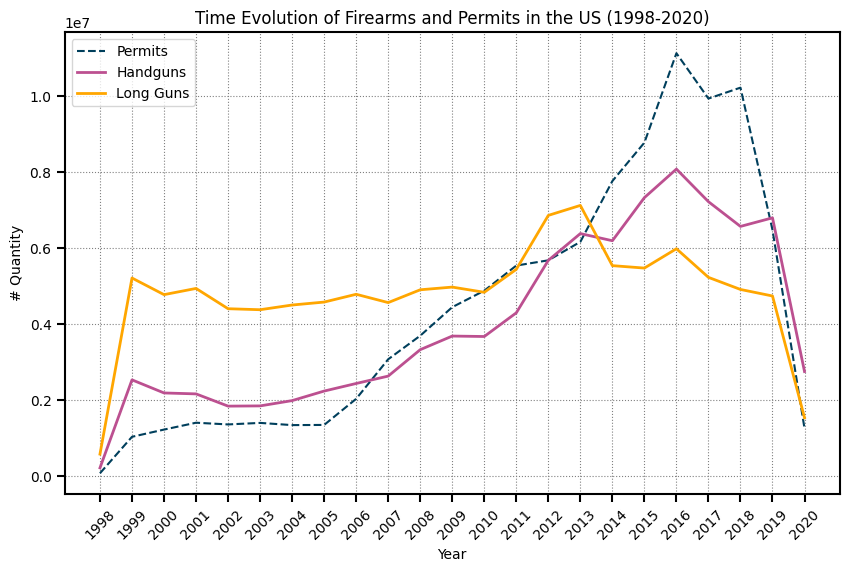

 The amount of permits and firearms have been increasing over the recent years.
While the number of permits always stay below the sum of the number of
firearms, there is a direct correlation between the number of firearms and the
number of permits. Nevertheless, the Covid pandemic, which struck in 2020, led
to a decrease in both the number of firearms and the number of permits. This
trend is in agreement with the information about mass shootings, reported in:
https://cnnespanol.cnn.com/2024/02/15/cultura-armas-estados-unidos-mundo-trax/


In [3]:
# firearm_analysis/visualization.py

import matplotlib.pyplot as plt
import pandas as pd
import textwrap


def time_evolution(url: str = "./Data/nics-firearm-background-checks.csv",
                   analysis: bool = False) -> None:
    """
    Reads a CSV file from a specified URL, renames some columns, modifies
    the "month" column and creates a plot showing the temporal evolution of the
    total number of "permit", "handgun", and "long_gun" per year.

    Args:
        (str, optional): URL of the CSV file. Must contain, at least, the
            columns "month", "state", "permit", "handgun" and "long_gun".
            Ddefaults to "./Data/nics-firearm-background-checks.csv".

    Returns:
        None
    """
    df = pd.read_csv(url)
    df.rename(columns={"longgun": "long_gun"}, inplace=True)
    df = df[["month", "state", "permit", "handgun", "long_gun"]]
    # Extract the year out of the 'month' column
    month_index = df.columns.get_loc("month")  # find index of 'month' column
    df.insert(month_index, "year", "")  # insert 'year' col right before
    # Copy-on-Write reccomended way to change the values of an object
    df.loc[:, ["year"]] = df["month"].str.split("-", expand=True)[0]
    df = df.drop(columns=["month"])
    df_grouped = df.groupby('year').sum().reset_index()
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df_grouped["year"], df_grouped["permit"], label="Permits",
             linestyle="dashed", color="#003f5c")
    plt.plot(df_grouped["year"], df_grouped["handgun"], label="Handguns",
             color="#bc5090", linewidth=2)
    plt.plot(df_grouped["year"], df_grouped["long_gun"], label="Long Guns",
             color="#ffa600", linewidth=2)
    # Labels properties
    plt.xlabel("Year")
    plt.ylabel("# Quantity")
    plt.title("Time Evolution of Firearms and Permits in the US (1998-2020)")
    plt.legend()
    plt.grid(True)
    # Set grid properties
    ax = plt.gca()
    ax.set_axisbelow(True)  # Draw grid lines behind other elements
    ax.xaxis.grid(color="gray", linestyle="dotted")  # grey dotted grid lines
    ax.yaxis.grid(color="gray", linestyle="dotted")  # grey dotted grid lines
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    # Set thicker border for the plot
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Adjust the thickness as needed
        spine.set_color("black")  # Adjust the color as needed
    # Add outer tick marks for x and y axes
    ax.tick_params(axis='x', direction='out', length=6, width=1.5)
    ax.tick_params(axis='y', direction='out', length=6, width=1.5)
    plt.show()
    # Togle the plot analysis to display the text
    if analysis:
        text = """
        The amount of permits and firearms have been increasing over the
        recent years. While the number of permits always stay below the sum
        of the number of firearms, there is a direct correlation between
        the number of firearms and the number of permits. Nevertheless, the
        Covid pandemic, which struck in 2020, led to a decrease in both the
        number of firearms and the number of permits. This trend is in
        agreement with the information about mass shootings, reported in:
        https://cnnespanol.cnn.com/2024/02/15/cultura-armas-estados-unidos-mundo-trax/
        """
        # Wrap the text to fit within 79 characters per line
        wrapped_lines = textwrap.wrap(textwrap.dedent(text), width=79)
        print("\n".join(wrapped_lines))


url = "./Data/nics-firearm-background-checks.csv"
time_evolution(url, analysis=True)

In [4]:
# firearm_analysis/state_analysis.py

import pandas as pd
import textwrap


def groupby_state(url: str =
                  "./Data/nics-firearm-background-checks.csv") -> pd.DataFrame:
    """
    Reads a CSV file from a specified URL, renames some columns, modifies the
    "month" column, groups the DataFrame by the "state" column and calculates
    the sum of the "permit", "handgun" and "long_gun" columns.

    Args:
        (str, optional): URL of the CSV file. Must contain, at least, the
            columns "month", "state", "permit", "handgun" and "long_gun".
            Defaults to "./Data/nics-firearm-background-checks.csv"

    Returns:
        pd.DataFrame: DataFrame grouped by "state" with cumulative values.
    """
    df = pd.read_csv(url)
    df.rename(columns={"longgun": "long_gun"}, inplace=True)
    df = df[["month", "state", "permit", "handgun", "long_gun"]]
    # Extract the year out of the 'month' column
    month_index = df.columns.get_loc("month")  # find index of 'month' column
    df.insert(month_index, "year", "")  # insert 'year' col right before
    # Copy-on-Write reccomended way to change the values of an object
    df.loc[:, ["year"]] = df["month"].str.split("-", expand=True)[0]
    df = df.drop(columns=["month"])
    df_grouped = df.groupby('state').sum().reset_index()
    df_grouped.drop(columns=["year"], inplace=True)
    display(df_grouped.head(5))
    return df_grouped


def clean_states(df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes rows corresponding to specific U.S. territories from the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing a "state" column.

    Returns:
        pd.DataFrame: A DataFrame with specified U.S. territories removed.
    """
    print(f"Number of states before removing undesired data: "
          f"{df['state'].nunique()}")
    states_to_remove = ["Guam", "Mariana Islands",
                        "Puerto Rico", "Virgin Islands"]
    df_cleaned = df[~df["state"].isin(states_to_remove)]
    print(f"Number of states after removing undesired data: "
          f"{df_cleaned['state'].nunique()}")
    return df_cleaned


def merge_datasets(df: pd.DataFrame,
                   url2: str = "./Data/us-state-populations.csv"
                   ) -> pd.DataFrame:
    """
    Merges the input DataFrame with a population DataFrame from a URL
    based on the "state" column.

    Args:
        df (pd.DataFrame): The input DataFrame containing, at least, a
            "state" column.
        url2 (str, optional): The URL of the population CSV file.
            Defaults to "./Data/us-state-populations.csv".

    Returns:
        pd.DataFrame: A merged DataFrame containing data from the input
            DataFrame and the DataFrame from the URL.
    """
    pop_df = pd.read_csv(url2)
    merged_df = pd.merge(df, pop_df, on="state")
    print("\nFirst rows of the merged DataFrames:")
    display(merged_df.head(5))
    return merged_df


def calculate_relative_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates values for the columns "permit", "long_gun", and "hand_gun"
    as percentages of the population.

    Args:
        df (pd.DataFrame): The input DataFrame containing, at least, the
            columns "permit", "long_gun", "hand_gun", and the "pop_2014"
            columns.

    Returns:
        pd.DataFrame: The DataFrame with additional columns for the relative
            values.
    """
    df["permit_perc"] = round((df["permit"] * 100) / df["pop_2014"], 3)
    df["longgun_perc"] = round((df["long_gun"] * 100) / df["pop_2014"], 3)
    df["handgun_perc"] = round((df["handgun"] * 100) / df["pop_2014"], 3)
    # TODO: comment out the next line
    display(df.head(5))
    return df


def analyze_kentucky(df: pd.DataFrame) -> None:
    """
    Analyzes the the colum "permit_perc" for the state of Kentucky and
    adjusts its value to the mean of the other states if it is an outlier.

    Args:
        df (pd.DataFrame): The input DataFrame containing, at least, the
            columns of "state" and "permit_perc".

    Returns:
        None
    """
    mean_permit_perc = round(df["permit_perc"].mean(), 2)
    print(f"Mean of registered firearms permits (permit_perc): "
          f"{mean_permit_perc}")
    print("\nData of the state of Kentucky:")
    display(df.loc[df["state"] == "Kentucky", :])
    # Replace Kentuky mean value with the mean of the other states
    df.loc[df["state"] == "Kentucky", "permit_perc"] = mean_permit_perc
    new_mean_permit_perc = round(df["permit_perc"].mean(), 2)
    print(f"\nNew mean of registered firearms permits (permit_perc): "
          f"{new_mean_permit_perc}")
    # Draw conclusions for the mean change in outliers
    if new_mean_permit_perc != mean_permit_perc:
        print("\nConclusions:\n")
        text = f"""
        The new mean is
        {round(abs((new_mean_permit_perc-mean_permit_perc)/mean_permit_perc),
        2)*100}% different than the mean containing the outlier, corresponding
        to the state of Kentucky. The mean is a statistical metric that can be
        prone to signicant variations when accounting for outling values.
        In contrast, the median is a more robust metric to measure central
        tendency of the data. Therefore, care must be taken when using the
        mean to extract conclusions.
        """
        # Wrap the text to fit within 79 characters per line
        wrapped_lines = textwrap.wrap(textwrap.dedent(text), width=79)
        print("\n".join(wrapped_lines))
    return df


url = "./Data/nics-firearm-background-checks.csv"
df_states = groupby_state(url)
df_states_removed = clean_states(df_states)
url2 = "./Data/us-state-populations.csv"
df_merged = merge_datasets(df_states_removed)
df_percent = calculate_relative_values(df_merged)
df_final = analyze_kentucky(df_percent)

,state,permit,handgun,long_gun
0,Alabama,1831707.0,2577822.0,2905635.0
1,Alaska,20022.0,518066.0,652905.0
2,Arizona,898033.0,2208229.0,1727865.0
3,Arkansas,619978.0,1151534.0,1857047.0
4,California,7711985.0,7060424.0,6738900.0


Number of states before removing undesired data: 55
Number of states after removing undesired data: 51

First rows of the merged DataFrames:


,state,permit,handgun,long_gun,code,pop_2014
0,Alabama,1831707.0,2577822.0,2905635.0,AL,4849377
1,Alaska,20022.0,518066.0,652905.0,AK,736732
2,Arizona,898033.0,2208229.0,1727865.0,AZ,6731484
3,Arkansas,619978.0,1151534.0,1857047.0,AR,2966369
4,California,7711985.0,7060424.0,6738900.0,CA,38802500


,state,permit,handgun,long_gun,code,pop_2014,permit_perc,longgun_perc,handgun_perc
0,Alabama,1831707.0,2577822.0,2905635.0,AL,4849377,37.772,59.918,53.158
1,Alaska,20022.0,518066.0,652905.0,AK,736732,2.718,88.622,70.319
2,Arizona,898033.0,2208229.0,1727865.0,AZ,6731484,13.341,25.668,32.804
3,Arkansas,619978.0,1151534.0,1857047.0,AR,2966369,20.900,62.603,38.820
4,California,7711985.0,7060424.0,6738900.0,CA,38802500,19.875,17.367,18.196


Mean of registered firearms permits (permit_perc): 34.88

Data of the state of Kentucky:


,state,permit,handgun,long_gun,code,pop_2014,permit_perc,longgun_perc,handgun_perc
17,Kentucky,32504282.0,2086026.0,2493701.0,KY,4413457,736.481,56.502,47.265



New mean of registered firearms permits (permit_perc): 21.12

Conclusions:

 The new mean is 39.0% different than the mean containing the outlier,
corresponding to the state of Kentucky. The mean is a statistical metric that
can be prone to signicant variations when accounting for outling values. In
contrast, the median is a more robust metric to measure central tendency of the
data. Therefore, care must be taken when using the mean to extract conclusions.


In [5]:
# firearm_analysis/map_generation.py

import folium
import pandas as pd
import selenium
import io
from PIL import Image


def create_maps(df):
    for column in ["permit_perc", "handgun_perc", "longgun_perc"]:
        # GeoJSON URL
        state_geo = "https://raw.githubusercontent.com/python-visualization/"
        state_geo += "folium/main/examples/data/us-states.json"
        # Initialize the map
        m = folium.Map(location=[40, -95], zoom_start=4)
        # Create Choropleth map
        folium.Choropleth(
            geo_data=state_geo,
            name="choropleth",
            data=df,
            columns=["code", column],
            key_on="feature.id",
            fill_color="YlGn",
            fill_opacity=0.7,
            line_opacity=0.1,
            legend_name=f"{' '.join(column.split('_'))}entage (%)",
        ).add_to(m)
        # Add layer control
        folium.LayerControl().add_to(m)
        # Save map as an image
        try:
            img_data = m._to_png(5)
            img = Image.open(io.BytesIO(img_data))
            img.save(f"{column}.png")
            print(f"Map for {column} saved successfully.")
        except Exception as e:
            print(f"Failed to save map for {column}. Error: {e}")


create_maps(df_final)

Map for permit_perc saved successfully.
Map for handgun_perc saved successfully.
Map for longgun_perc saved successfully.


## **Tests:**

In [6]:
# tests/test_data_processing.py

import unittest
# import pandas as pd
# from firearm_analysis.data_processing import (
#     read_csv, clean_csv, rename_col, breakdown_date, erase_month,
#     groupby_state_and_year, print_biggest_handguns, print_biggest_longguns
# )


class TestDataProcessing(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Create a sample DataFrame for testing
        cls.df = pd.DataFrame({
            "month": ["2020-01", "2020-02"],
            "state": ["Kentucky", "Kentucky"],
            "permit": [100, 150],
            "handgun": [200, 250],
            "long_gun": [300, 350],
        })

    def test_read_csv(self):
        url = "./Data/nics-firearm-background-checks.csv"
        df = read_csv(url)
        self.assertIsInstance(df, pd.DataFrame)

    def test_clean_csv(self):
        df_clean = clean_csv(self.df)
        self.assertIn("permit", df_clean.columns)
        self.assertNotIn("permit_recheck", df_clean.columns)

    def test_rename_col(self):
        df_renamed = rename_col(self.df)
        self.assertIn("long_gun", df_renamed.columns)
        self.assertNotIn("longgun", df_renamed.columns)

    def test_breakdown_date(self):
        df_with_date = breakdown_date(self.df)
        self.assertIn("year", df_with_date.columns)
        self.assertIn("month", df_with_date.columns)

    def test_erase_month(self):
        df_no_month = erase_month(self.df)
        self.assertNotIn("month", df_no_month.columns)

    def test_groupby_state_and_year(self):
        df_grouped = groupby_state_and_year(self.df)
        self.assertIn("state", df_grouped.columns)
        self.assertIn("year", df_grouped.columns)
        self.assertEqual(df_grouped.shape[0], 2)


# if __name__ == "__main__":
#     unittest.main()

In [7]:
# tests/test_visualization.py

import unittest
import pandas as pd
# from firearm_analysis.visualization import time_evolution


class TestVisualization(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Create a sample DataFrame for testing
        cls.df = pd.DataFrame({
            "year": ["2020", "2021", "2022", "2023", "2024"],
            "permit": [100, 113, 115, 114, 118],
            "handgun": [200, 193, 190, 195, 192],
            "long_gun": [300, 320, 330, 310, 315],
        })

    def test_time_evolution(self):
        try:
            time_evolution(self.df)
        except Exception as e:
            self.fail(f"`time_evolution()` raised Exception unexpectedly! {e}")


# if __name__ == '__main__':
#     unittest.main()

In [8]:
# tests/test_state_analysis.py

import unittest
import pandas as pd
# from firearm_analysis.state_analysis import state_percentage


class TestStateAnalysis(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Create a sample DataFrame for testing
        cls.df = pd.DataFrame({
            "month": ["2020-01", "2020-02"],
            "state": ["Kentucky", "Kentucky"],
            "permit": [100, 150],
            "handgun": [200, 250],
            "long_gun": [300, 350],
        })

    def test_state_percentage(self):
        result_df = state_percentage("Kentucky")
        self.assertIn("permit_perc", result_df.columns)
        self.assertIn("handgun_perc", result_df.columns)
        self.assertIn("longgun_perc", result_df.columns)


# if __name__ == '__main__':
#     unittest.main()

In [9]:
# tests/test_map_generation.py

import unittest
import pandas as pd
# from firearm_analysis.map_generation import create_maps


class TestMapGeneration(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        # Create a sample DataFrame for testing
        cls.df = pd.DataFrame({
            "code": ["KY", "AL", "CA", "OR", "FL"],
            "permit_perc": [53, 62, 10, 15, 95],
            "handgun_perc": [34, 27, 7, 13, 83],
            "longgun_perc": [23, 15, 5, 9, 58],
        })

    def test_create_maps(self):
        try:
            create_maps(self.df)
        except Exception as e:
            self.fail(f"create_maps raised Exception unexpectedly! {e}")


# if __name__ == '__main__':
#     unittest.main()

## **Main code:**


First five columns of the DataFrame:



,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-03,Alabama,31205.0,606.0,34897.0,17850.0,1583.0,1744,0.0,36.0,...,0.0,0.0,0.0,42.0,23.0,8.0,2.0,2.0,0.0,92652
1,2020-03,Alaska,143.0,4.0,4657.0,3819.0,487.0,386,0.0,0.0,...,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,9939
2,2020-03,Arizona,5685.0,958.0,46377.0,19346.0,2433.0,4846,0.0,18.0,...,2.0,0.0,0.0,21.0,11.0,5.0,0.0,0.0,0.0,82771
3,2020-03,Arkansas,2424.0,673.0,15304.0,8968.0,600.0,885,4.0,27.0,...,0.0,0.0,0.0,11.0,10.0,3.0,1.0,0.0,2.0,31651
4,2020-03,California,27792.0,0.0,81543.0,48616.0,5041.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164497



Structure of the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14135 entries, 0 to 14134
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14135 non-null  object 
 1   state                      14135 non-null  object 
 2   permit                     14111 non-null  float64
 3   permit_recheck             2750 non-null   float64
 4   handgun                    14115 non-null  float64
 5   long_gun                   14116 non-null  float64
 6   other                      7150 non-null   float64
 7   multiple                   14135 non-null  int64  
 8   admin                      14112 non-null  float64
 9   prepawn_handgun            12192 non-null  float64
 10  prepawn_long_gun           12190 non-null  float64
 11  prepawn_other              6765 non-null   float64
 12  redemption_handgun         12195 non-null  float64
 13  redemption_long_

None


Original DataFrame columns:
['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']

Columns of DataFrame after renaming:
['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 're

,year,month,state,permit,handgun,long_gun
0,2020,03,Alabama,31205.0,34897.0,17850.0
1,2020,03,Alaska,143.0,4657.0,3819.0
2,2020,03,Arizona,5685.0,46377.0,19346.0
3,2020,03,Arkansas,2424.0,15304.0,8968.0
4,2020,03,California,27792.0,81543.0,48616.0



DataFrame without the 'month' column:


,year,state,permit,handgun,long_gun
0,2020,Alabama,31205.0,34897.0,17850.0
1,2020,Alaska,143.0,4657.0,3819.0
2,2020,Arizona,5685.0,46377.0,19346.0
3,2020,Arkansas,2424.0,15304.0,8968.0
4,2020,California,27792.0,81543.0,48616.0



Current columns of the DataFrame:
['year', 'state', 'permit', 'handgun', 'long_gun']

Grouped data by 'year' and 'state':


,state,year,permit,handgun,long_gun
0,Alabama,1998,0.0,10567.0,25723.0
1,Alabama,1999,0.0,94544.0,149017.0
2,Alabama,2000,12.0,81983.0,136767.0
3,Alabama,2001,0.0,83885.0,134914.0
4,Alabama,2002,0.0,65294.0,111339.0



The biggest number handguns was registered in Florida during the year 2016 with a total of 662308.0 handguns.

The biggest number long guns was registered in Pennsylvania during the year 2012 with a total of 873543.0 long guns.


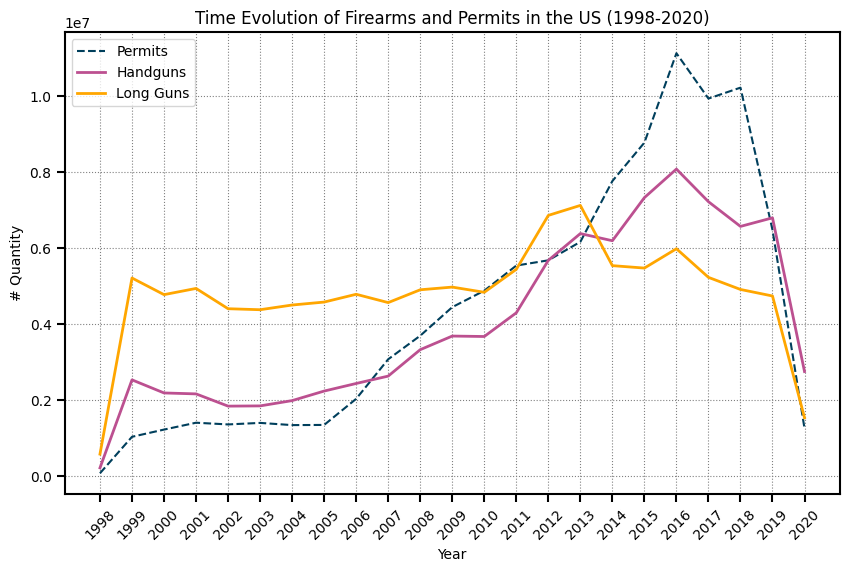

,state,permit,handgun,long_gun
0,Alabama,1831707.0,2577822.0,2905635.0
1,Alaska,20022.0,518066.0,652905.0
2,Arizona,898033.0,2208229.0,1727865.0
3,Arkansas,619978.0,1151534.0,1857047.0
4,California,7711985.0,7060424.0,6738900.0


Number of states before removing undesired data: 55
Number of states after removing undesired data: 51

First rows of the merged DataFrames:


,state,permit,handgun,long_gun,code,pop_2014
0,Alabama,1831707.0,2577822.0,2905635.0,AL,4849377
1,Alaska,20022.0,518066.0,652905.0,AK,736732
2,Arizona,898033.0,2208229.0,1727865.0,AZ,6731484
3,Arkansas,619978.0,1151534.0,1857047.0,AR,2966369
4,California,7711985.0,7060424.0,6738900.0,CA,38802500


,state,permit,handgun,long_gun,code,pop_2014,permit_perc,longgun_perc,handgun_perc
0,Alabama,1831707.0,2577822.0,2905635.0,AL,4849377,37.772,59.918,53.158
1,Alaska,20022.0,518066.0,652905.0,AK,736732,2.718,88.622,70.319
2,Arizona,898033.0,2208229.0,1727865.0,AZ,6731484,13.341,25.668,32.804
3,Arkansas,619978.0,1151534.0,1857047.0,AR,2966369,20.900,62.603,38.820
4,California,7711985.0,7060424.0,6738900.0,CA,38802500,19.875,17.367,18.196


Mean of registered firearms permits (permit_perc): 34.88

Data of the state of Kentucky:


,state,permit,handgun,long_gun,code,pop_2014,permit_perc,longgun_perc,handgun_perc
17,Kentucky,32504282.0,2086026.0,2493701.0,KY,4413457,736.481,56.502,47.265



New mean of registered firearms permits (permit_perc): 21.12

Conclusions:

 The new mean is 39.0% different than the mean containing the outlier,
corresponding to the state of Kentucky. The mean is a statistical metric that
can be prone to significant variations when accounting for outlying values. In
contrast, the median is a more robust metric to measure central tendency of the
data. Therefore, care must be taken when using the mean to extract conclusions.


In [10]:
# main.py

from firearm_analysis.data_processing import (
    read_csv, clean_csv, rename_col, breakdown_date, erase_month,
    groupby_state_and_year, print_biggest_handguns, print_biggest_longguns
)
from firearm_analysis.visualization import time_evolution
from firearm_analysis.state_analysis import (
    groupby_state, clean_states, merge_datasets, calculate_relative_values,
    analyze_kentucky
)
from firearm_analysis.map_generation import create_maps


def main():

    # Read the CSV file
    url = "./Data/nics-firearm-background-checks.csv"
    df = read_csv(url)

    # Rename column
    df_renamed = rename_col(df)

    # Clean the DataFrame
    df_clean = clean_csv(df_renamed)

    # Split the "month" column into "year" and "month"
    df_date = breakdown_date(df_clean)

    # Delete the "month" column
    df_no_month = erase_month(df_date)

    # Group the data by the "year" and "state" columns
    df_grouped = groupby_state_and_year(df_no_month)

    # Print out the biggest number of registered handguns
    df_max_handguns = print_biggest_handguns(df_grouped)

    # Print out the biggest number of registered long guns
    df_max_longguns = print_biggest_longguns(df_grouped)

    # Create temporal evolution graph
    time_evolution(url)

    # Group the DataFrame by states
    df_states = groupby_state(url)

    # Remove territories
    df_states_removed = clean_states(df_states)

    # Merge the DataFrames from another URL
    url2 = "./Data/us-state-populations.csv"
    df_merged = merge_datasets(df_states_removed)

    # Calculate relative values
    df_percent = calculate_relative_values(df_merged)

    # Analyze and remove outliers
    df_final = analyze_kentucky(df_percent)

    # Create choropletic maps
    create_maps(df_final)


if __name__ == "__main__":
    main()